<a href="https://colab.research.google.com/github/Savvythelegend/MLE/blob/main/from_scratch/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Watch the Gradient Descent Without any external tools

In [ ]:
# Gradient Descent Parameters
alpha = 0.00001       # learning rate (hyperparameter)
epochs = 1000      # number of iterations
m = len(X)         # number of data points

# Initialize parameters (theta_0 = intercept, theta_1 = slope)
theta_0 = 0
theta_1 = 0

# Training loop
for epoch in range(epochs):
    y_pred = [theta_0 + theta_1 * x_i for x_i in X]  # predictions
    error = [y_pred[i] - y[i] for i in range(m)]     # prediction error

    # Compute gradients
    d_theta_0 = (1/m) * sum(error)
    d_theta_1 = (1/m) * sum([error[i] * X[i] for i in range(m)])

    # Update parameters
    theta_0 -= alpha * d_theta_0
    theta_1 -= alpha * d_theta_1

    # Optional: Print cost every 100 iterations
    if epoch % 100 == 0:
        cost = (1/(2*m)) * sum([e**2 for e in error])
        print(f"Epoch {epoch}: Cost={cost:.4f}, Intercept={theta_0:.4f}, Slope={theta_1:.4f}")


Epoch 0: Cost=55000.0000, Intercept=0.0030, Slope=0.1100
Epoch 100: Cost=6010.3914, Intercept=0.1834, Slope=6.7256
Epoch 200: Cost=656.8200, Intercept=0.2430, Slope=8.9126
Epoch 300: Cost=71.7831, Intercept=0.2627, Slope=9.6356
Epoch 400: Cost=7.8504, Intercept=0.2692, Slope=9.8746
Epoch 500: Cost=0.8639, Intercept=0.2713, Slope=9.9536
Epoch 600: Cost=0.1004, Intercept=0.2719, Slope=9.9797
Epoch 700: Cost=0.0170, Intercept=0.2721, Slope=9.9883
Epoch 800: Cost=0.0079, Intercept=0.2721, Slope=9.9912
Epoch 900: Cost=0.0069, Intercept=0.2721, Slope=9.9921


## Multivarirate Vectorized Linear Regression: Using Numpy (computinng the Graident Descent)


In [ ]:
import numpy as np

# Step 1: Input data (without bias column)
X_raw = np.array([
    [2100, 3],
    [1600, 2],
    [2400, 4]
])  # shape: (3, 2)

y = np.array([
    [400],
    [330],
    [369]
])  # shape: (3, 1)

m = len(y)  # number of examples

# Step 2: Feature Normalization (mean normalization)
mean = np.mean(X_raw, axis=0)
std = np.std(X_raw, axis=0)
X_scaled = (X_raw - mean) / std  # normalized features

# Step 3: Add bias term (column of 1s)
X = np.c_[np.ones((m, 1)), X_scaled]  # shape: (3, 3)

# Step 4: Initialize parameters
theta = np.zeros((X.shape[1], 1))  # shape: (3, 1)

# Step 5: Hyperparameters
alpha = 0.01
epochs = 1000

# Step 6: Gradient Descent loop
for epoch in range(epochs):
    y_pred = X @ theta                # predictions: shape (m, 1)
    error = y_pred - y                # error: shape (m, 1)
    gradients = (1/m) * (X.T @ error) # shape: (n+1, 1)
    theta -= alpha * gradients        # weigths update

    # Optional: print cost every 100 epochs
    if epoch % 100 == 0:
        cost = (1/(2*m)) * np.sum(error**2)
        print(f"Epoch {epoch}: Cost = {cost:.4f}")

# Final theta
print("\nFinal parameters:")
print(f"Intercept (theta_0): {theta[0][0]:.4f}")
print(f"Slope for feature 1 (theta_1): {theta[1][0]:.4f}")
print(f"Slope for feature 2 (theta_2): {theta[2][0]:.4f}")

Epoch 0: Cost = 67510.1667
Epoch 100: Cost = 9243.1174
Epoch 200: Cost = 1449.7473
Epoch 300: Cost = 401.6122
Epoch 400: Cost = 256.9782
Epoch 500: Cost = 233.4748
Epoch 600: Cost = 226.2841
Epoch 700: Cost = 221.3611
Epoch 800: Cost = 216.8223
Epoch 900: Cost = 212.4137

Final parameters:
Intercept (theta_0): 366.3175
Slope for feature 1 (theta_1): 24.2014
Slope for feature 2 (theta_2): -6.5705


### That means your final learned hypothesis function (in normalized feature space) is:

𝑦
^
=
366.3175
+
24.2014
⋅
𝑥
1
(
𝑠
𝑐
𝑎
𝑙
𝑒
𝑑
)
−
6.5705
⋅
𝑥
2
(
𝑠
𝑐
𝑎
𝑙
𝑒
𝑑
)
y
^
​
 =366.3175+24.2014⋅x
1
(scaled)
​
 −6.5705⋅x
2
(scaled)
​


This confirms:



*   Gradient descent is converging.
*   Feature scaling worked (no nan or exploding values).
*   Learning rate alpha = 0.01 is reasonable.







# Boston House Price Prediction (Linear Regression Model)


---
In this project you will work on developing an end to end machine learning project using linear regression, as this will be your first project in your machine learning journey. We will be doing extensive data visualization, we will perform data feature engineering, we will also see how we can select features based on the correlation of the features.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import pandas as pd
import numpy as np

"""DATA Preprocessing:"""

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data_array = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target_array = raw_df.values[1::2, 2]

# Create a pandas DataFrame with appropriate column names
feature_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
    'PTRATIO', 'B', 'LSTAT'
]
data = pd.DataFrame(data_array, columns=feature_names)
data["SalePrice"] = target_array # saleprice
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,SalePrice
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
raw_df.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,1012.000000,1012.000000,1012.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,180.143778,12.008350,16.834792,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534
std,188.132839,17.250728,9.912616,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000
25%,0.257830,0.000000,8.375000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000
50%,24.021000,7.240000,18.100000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000
75%,391.435000,16.780000,21.890000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000
max,396.900000,100.000000,50.000000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000


In [ ]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,SalePrice
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    float64
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    float64
 9   TAX        506 non-null    float64
 10  PTRATIO    506 non-null    float64
 11  B          506 non-null    float64
 12  LSTAT      506 non-null    float64
 13  SalePrice  506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### EDA

In [ ]:
data.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


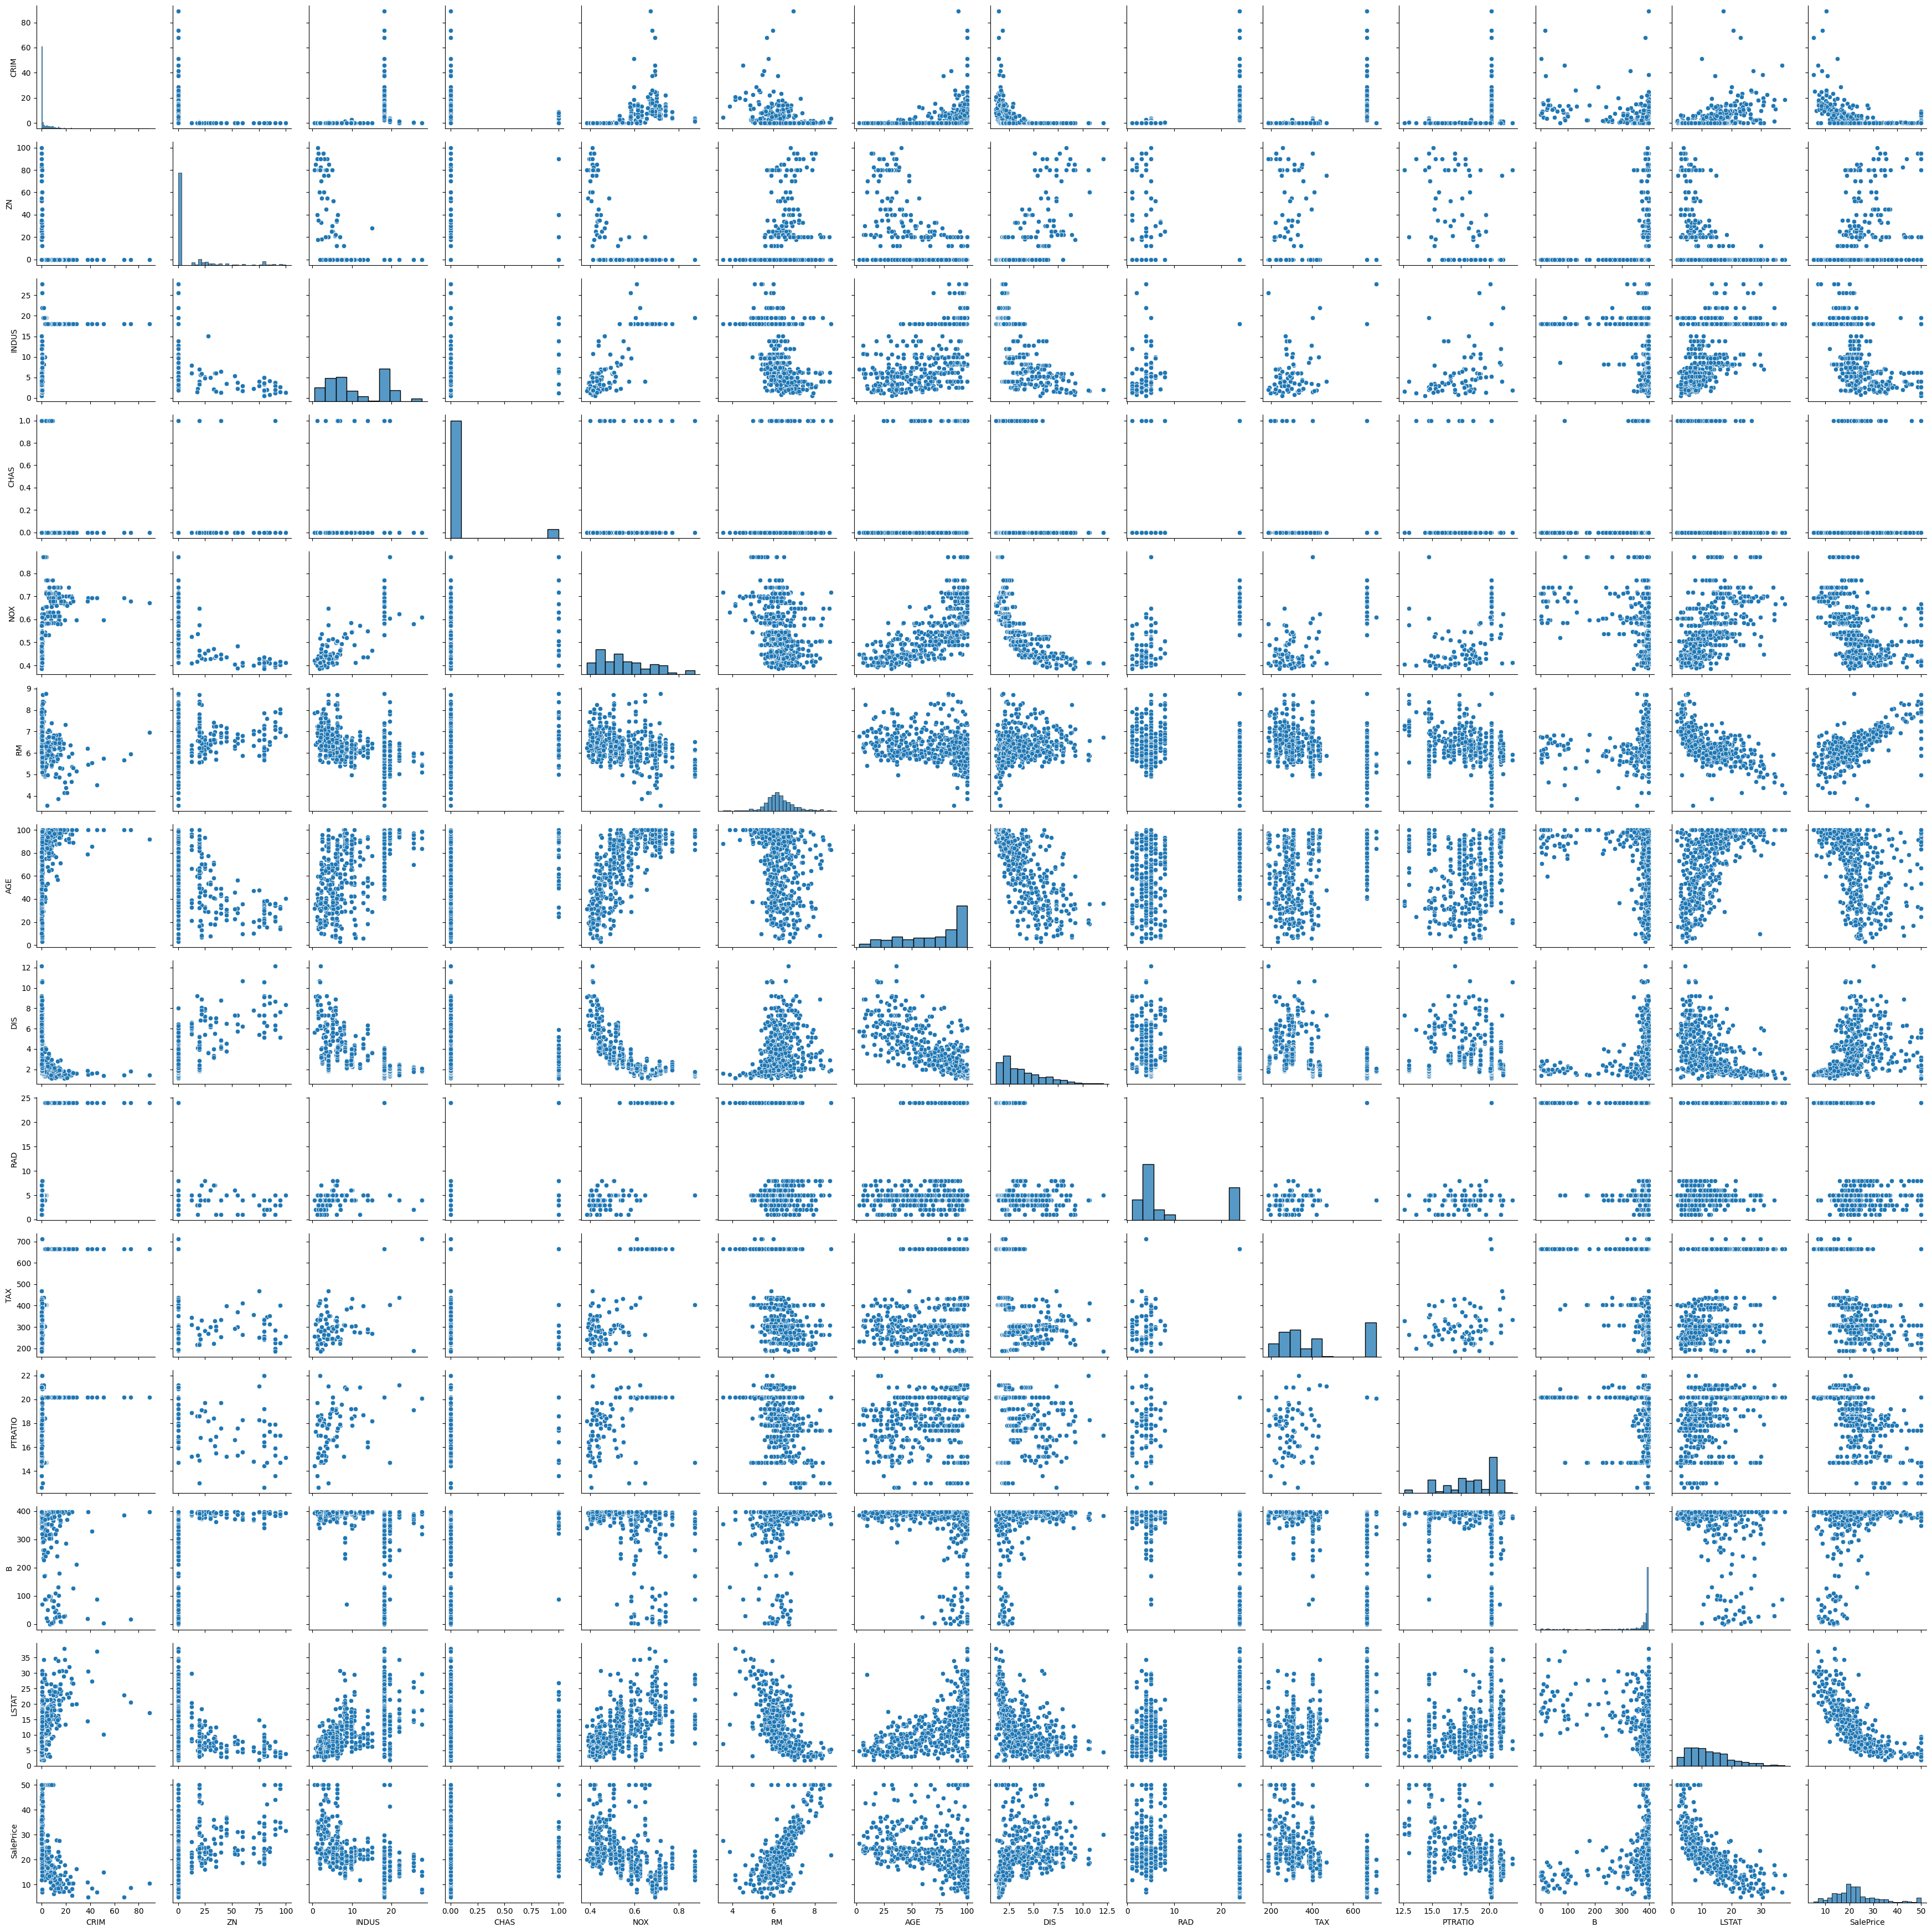

In [ ]:
sns.pairplot(data, height=2.5)
plt.tight_layout()

/tmp/ipython-input-18-2040591248.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SalePrice']);


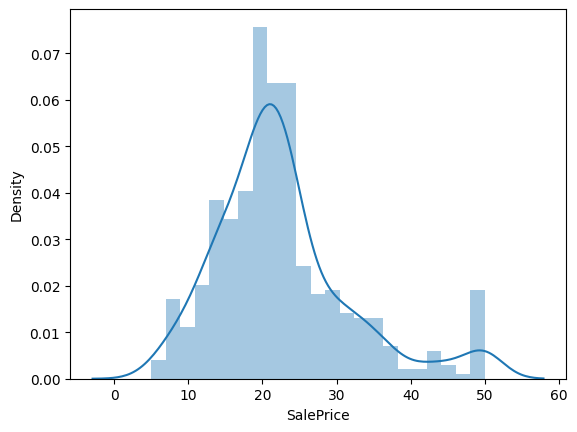

In [ ]:
"""
Histogram with KDE (estimation of pdf) using density scale (Y-axis normalized to area = 1)
Bars represent the proportion of observations per bin, not raw counts
The KDE curve shows the smoothed distribution shape clearly
Useful for observing skewness and comparing across datasets

"""
sns.distplot(data['SalePrice']);

<Axes: xlabel='SalePrice', ylabel='Count'>

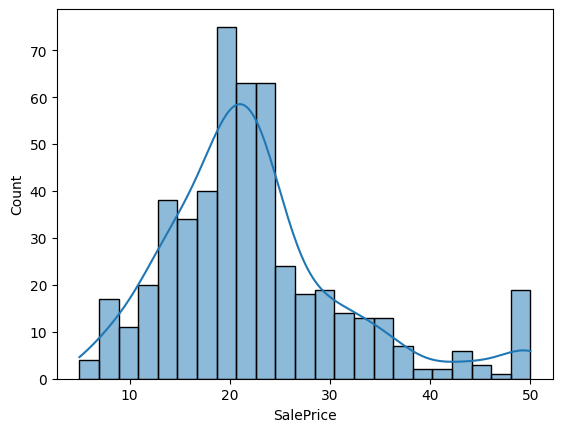

In [ ]:
"""
Plot a histogram of the data with a KDE (smooth curve) overlaid
Y-axis shows raw counts (number of data points per bin)
Good for visualizing overall distribution and concentration
KDE helps reveal the underlying shape (e.g., skew, multimodality)
"""

sns.histplot(data['SalePrice'], kde=True)

In [ ]:
"""
What is ideal?
Metric	Ideal for Normal Distribution	Your Value	Interpretation
Skewness	0	+1.108	Moderately right-skewed
Kurtosis	3 (for normal, in stats)	1.495	Platykurtic (flatter than normal)
"""

print("Skewness: %f" % data['SalePrice'].skew())
print("Kurtosis: %f" % data['SalePrice'].kurt())

Skewness: 1.108098
Kurtosis: 1.495197


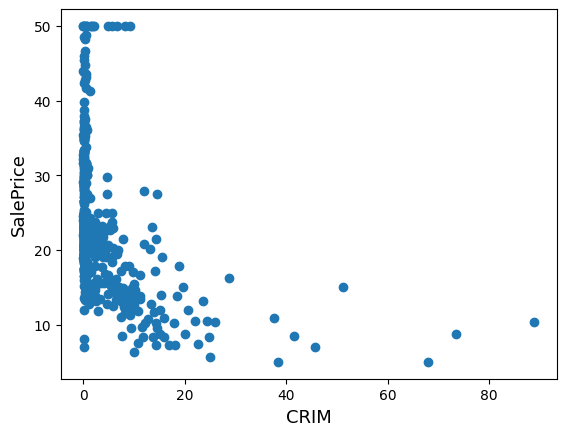

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = data['CRIM'], y = data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('CRIM', fontsize=13)
plt.show()

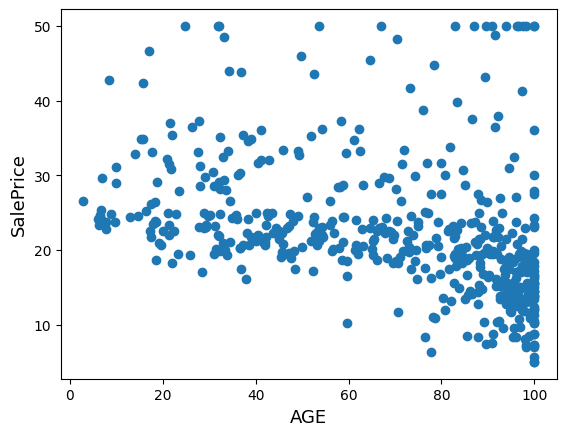

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = data['AGE'], y = data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('AGE', fontsize=13)
plt.show()

/tmp/ipython-input-28-932968018.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SalePrice'] , fit=norm);



 mu = 22.53 and sigma = 9.19



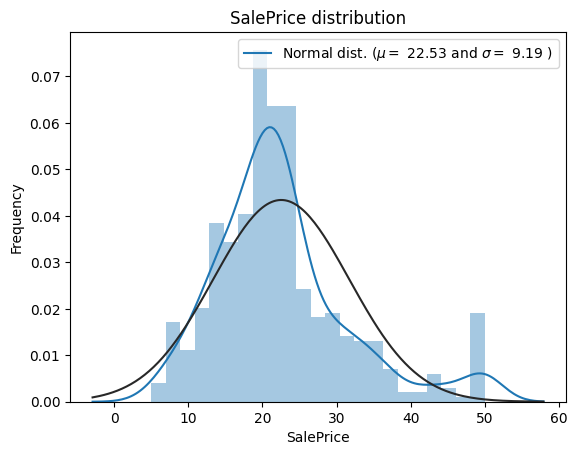

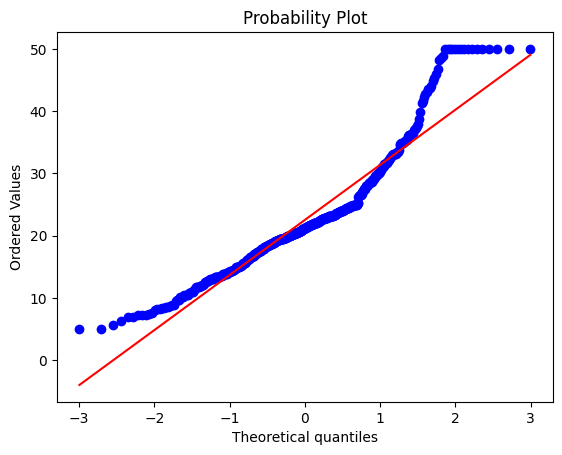

In [ ]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

sns.distplot(data['SalePrice'] , fit=norm);

(mu, sigma) = norm.fit(data['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

"""
Interpretation of This QQ Plot
1. If the data were perfectly normal:
The blue dots would lie exactly on the red line

2. What this plot shows:
The middle values lie close to the line → central values follow normal distribution approximately
The right tail (upper quantiles) curves upward above the line → shows positive skew (right-skewed)
The top-most values flatten out → possibly capped or have outliers
The left tail (lower values) also slightly deviate from the line
"""
fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)
plt.show()

### **DATA Correlation**

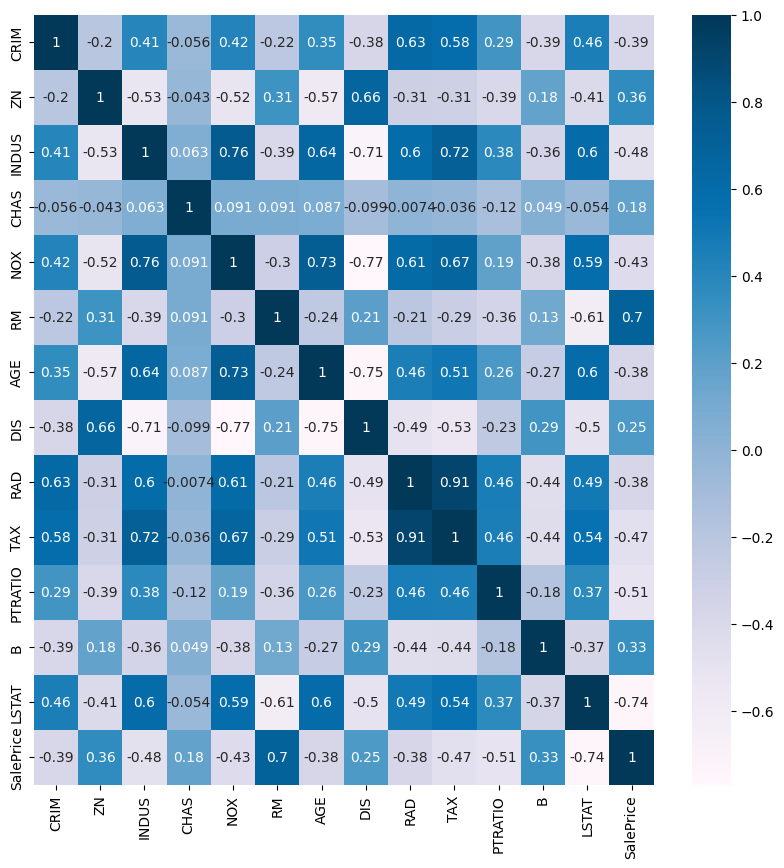

In [ ]:
plt.figure(figsize=(10,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.PuBu)
plt.show()

In [ ]:
"""
names = {index:val for index,val in relevant_features.items()}
# names.remove('SalePrice')
core = [_ for _, __ in names.items()]
core

"""

['CRIM',
 'ZN',
 'INDUS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'SalePrice']

In [ ]:
cor_target = abs(cor["SalePrice"]) # absolute value of the correlation
relevant_features = cor_target[cor_target>0.2] # highly correlated features
# names = [index for index, value in relevant_features.] # getting the names of the features
# names.remove('SalePrice') # removing target feature

# print(names) # printing the features
# print(len(names))
names = list(relevant_features.index)
names.remove('SalePrice')
names

['CRIM',
 'ZN',
 'INDUS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

/tmp/ipython-input-56-2807620848.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SalePrice'] , fit=norm);



 mu = 1.40 and sigma = 0.10



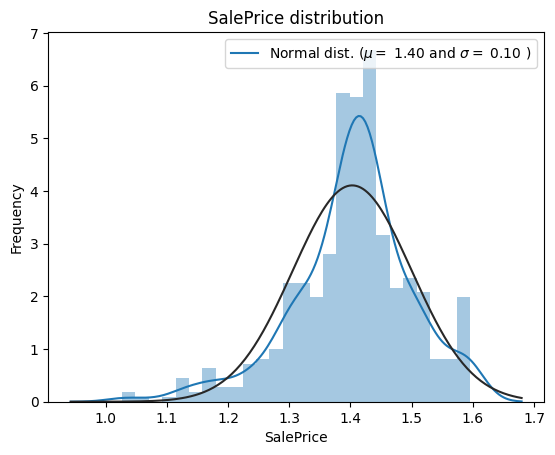

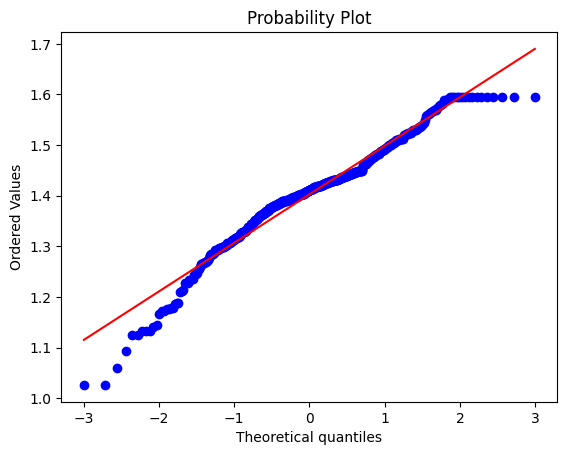

In [ ]:
"""
Log-transform the target variable (SalePrice) and assess normality.

Steps:
1. Apply np.log1p to SalePrice to reduce right skewness and compress large values.
2. Plot the transformed distribution using Seaborn's distplot with a fitted normal curve.
3. Fit a normal distribution using scipy.stats.norm and extract mu (mean) and sigma (std).
4. Display the legend, labels, and a Q-Q plot to visually confirm improved normality.

This transformation helps satisfy normality assumptions for linear models.
"""


data["SalePrice"] = np.log1p(data["SalePrice"])
sns.distplot(data['SalePrice'] , fit=norm);

(mu, sigma) = norm.fit(data['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)
plt.show()

## **Model Building**

In [ ]:
from sklearn.model_selection import train_test_split

X = data[names]  # only contains the relevant features (only to follow the best practices)
y = data["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 12)
(102, 12)
(404,)
(102,)


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
predictions = lr.predict(X_test)
print("Actual value of the house:- ", y_test[0])
print("Model Predicted Value:- ", predictions[0])

Actual value of the house:-  1.4395687003478856
Model Predicted Value:-  1.4745843936513476


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(rmse)

0.048154504829149965


## Okay

Using `np.expm1` to convert back from log-transformed predictions:

*   Actual house value: `np.expm1(1.4396) ≈ 4.22`, which is approximately $4,220
*   Model Predicted Value: `np.expm1(1.4746) ≈ 4.36`, which is approximately $4,360

The model's prediction is off by approximately $4,360 - $4,220 = $140 for this specific example.

The average house price in the dataset is ~$22,000–$25,000 (corresponding to a log1p value of around 3.1).

**Test Accuracy:**

The Root Mean Squared Error (RMSE) on the test set is approximately **0.0482**. This value is in the log-transformed scale of the SalePrice.

**Generalization:**

This Linear Regression model, trained on selected features of the Boston Housing dataset, achieves an RMSE of 0.0482 on the log-transformed sale prices. This corresponds to a typical prediction error of about ±4.94% on the original price scale. For example, for a home priced at $4,220
the model prediction would typically fall within the range of $4,021 – $4,421.